In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

In [2]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

### load datasets

In [6]:
datasets = {}

##### MNIST

In [7]:
from tensorflow.keras.datasets import mnist

# load dataset
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
X_train = (train_images/255.).astype('float32')
X_test = (test_images/255.).astype('float32')
X_train = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))

# subset a validation set
n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:]
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid]

# flatten X
X_train_flat = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test_flat = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))
X_valid_flat= X_valid.reshape((len(X_valid), np.product(np.shape(X_valid)[1:])))
print(len(X_train), len(X_valid), len(X_test))

50000 10000 10000


In [8]:
datasets['mnist'] = {'X':{}, 'Y':{}}
datasets['mnist']['X']['train'] = X_train
datasets['mnist']['X']['valid'] = X_valid
datasets['mnist']['X']['test'] = X_test
datasets['mnist']['Y']['train'] = Y_train
datasets['mnist']['Y']['valid'] = Y_valid
datasets['mnist']['Y']['test'] = Y_test

##### cifar10

In [9]:
from tensorflow.keras.datasets import cifar10

# load dataset
(train_images, Y_train), (test_images, Y_test) = cifar10.load_data()
X_train = (train_images/255.).astype('float32')
X_test = (test_images/255.).astype('float32')
X_train = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))

# subset a validation set
n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:].flatten()
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid].flatten()
Y_test = Y_test.flatten()

print(len(X_train), len(X_valid), len(X_test))

40000 10000 10000


In [10]:
datasets['cifar10'] = {'X':{}, 'Y':{}}
datasets['cifar10']['X']['train'] = X_train
datasets['cifar10']['X']['valid'] = X_valid
datasets['cifar10']['X']['test'] = X_test
datasets['cifar10']['Y']['train'] = Y_train
datasets['cifar10']['Y']['valid'] = Y_valid
datasets['cifar10']['Y']['test'] = Y_test

##### FMNIST

In [11]:
from tensorflow.keras.datasets import fashion_mnist

# load dataset
(train_images, Y_train), (test_images, Y_test) = fashion_mnist.load_data()
X_train = (train_images/255.).astype('float32')
X_test = (test_images/255.).astype('float32')
X_train = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))

# subset a validation set
n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:]
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid]

# flatten X
X_train_flat = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test_flat = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))
X_valid_flat= X_valid.reshape((len(X_valid), np.product(np.shape(X_valid)[1:])))
print(len(X_train), len(X_valid), len(X_test))

50000 10000 10000


In [12]:
datasets['fmnist'] = {'X':{}, 'Y':{}}
datasets['fmnist']['X']['train'] = X_train
datasets['fmnist']['X']['valid'] = X_valid
datasets['fmnist']['X']['test'] = X_test
datasets['fmnist']['Y']['train'] = Y_train
datasets['fmnist']['Y']['valid'] = Y_valid
datasets['fmnist']['Y']['test'] = Y_test

##### Cassins

In [13]:
syllable_df = pd.read_pickle(DATA_DIR/'cassins'/ 'cassins.pickle').drop(columns=['audio'])
top_labels = (
    pd.DataFrame(
        {i: [np.sum(syllable_df.labels.values == i)] for i in syllable_df.labels.unique()}
    )
    .T.sort_values(by=0, ascending=False)[:20]
    .T
)
top_labels
sylllable_df = syllable_df[syllable_df.labels.isin(top_labels.columns)]
sylllable_df = sylllable_df.reset_index()

specs = np.array(list(sylllable_df.spectrogram.values))
specs.shape

sylllable_df['subset'] = 'train'
sylllable_df.loc[:1000, 'subset'] = 'valid'
sylllable_df.loc[1000:1999, 'subset'] = 'test'

len(sylllable_df)

Y_train = np.array(list(sylllable_df.labels.values[sylllable_df.subset == 'train']))
Y_valid = np.array(list(sylllable_df.labels.values[sylllable_df.subset == 'valid']))
Y_test = np.array(list(sylllable_df.labels.values[sylllable_df.subset == 'test']))

X_train = np.array(list(sylllable_df.spectrogram.values[sylllable_df.subset == 'train'])) #/ 255.
X_valid = np.array(list(sylllable_df.spectrogram.values[sylllable_df.subset == 'valid']))# / 255.
X_test = np.array(list(sylllable_df.spectrogram.values[sylllable_df.subset == 'test'])) #/ 255.

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
Y_train = enc.fit_transform([[i] for i in Y_train]).astype('int').flatten()

In [14]:
datasets['cassins_dtw'] = {'X':{}, 'Y':{}}
datasets['cassins_dtw']['X']['train'] = X_train
datasets['cassins_dtw']['X']['valid'] = X_valid
datasets['cassins_dtw']['X']['test'] = X_test
datasets['cassins_dtw']['Y']['train'] = Y_train
datasets['cassins_dtw']['Y']['valid'] = Y_valid
datasets['cassins_dtw']['Y']['test'] = Y_test

##### Moons

In [15]:
from sklearn.datasets import make_moons

In [16]:
X_train, Y_train = make_moons(1000, random_state=0, noise=0.1)
X_train_flat = X_train
X_test, Y_test = make_moons(1000, random_state=1, noise=0.1)
X_test_flat = X_test
X_valid, Y_valid = make_moons(1000, random_state=2, noise=0.1)

In [17]:
datasets['moons'] = {'X':{}, 'Y':{}}
datasets['moons']['X']['train'] = X_train
datasets['moons']['X']['valid'] = X_valid
datasets['moons']['X']['test'] = X_test
datasets['moons']['Y']['train'] = Y_train
datasets['moons']['Y']['valid'] = Y_valid
datasets['moons']['Y']['test'] = Y_test

##### Bison

In [18]:
import requests
import json
url = "https://raw.githubusercontent.com/duhaime/umap-zoo/03819ed0954b524919671a72f61a56032099ba11/data/json/bison.json"
animal = np.array(json.loads(requests.get(url).text)['3d'])

X_train = animal
Y_train = animal[:, 0]

In [19]:
datasets['bison'] = {'X':{}, 'Y':{}}
datasets['bison']['X']['train'] = X_train
datasets['bison']['Y']['train'] = Y_train

##### macoskco2015

In [20]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR
import gzip
import pickle

with gzip.open(DATA_DIR / 'macosko_2015.pkl.gz', "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.1, random_state=42)

n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:]
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid]

X_train_flat = X_train

In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

Y_train = enc.fit_transform([[i] for i in Y_train]).flatten()

In [23]:
datasets['macosko2015'] = {'X':{}, 'Y':{}}
datasets['macosko2015']['X']['train'] = X_train
datasets['macosko2015']['X']['valid'] = X_valid
datasets['macosko2015']['X']['test'] = X_test
datasets['macosko2015']['Y']['train'] = Y_train
datasets['macosko2015']['Y']['valid'] = Y_valid
datasets['macosko2015']['Y']['test'] = Y_test

### Plot data

In [24]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR, FIGURE_DIR, save_fig

In [25]:
dset_params = {
    'moons': {
        'cmap': plt.cm.coolwarm,
        's': 10,
        'alpha': 0.5,
        
    }, 
    'mnist': {
        'cmap': plt.cm.tab10,
        's': 0.1,
        'alpha': 0.5,  
    }, 
    'fmnist': {
        'cmap': plt.cm.tab10,
        's': 0.1,
        'alpha': 0.5,  
    }, 
    'bison': {
        'cmap': plt.cm.viridis,
        's': 0.1,
        'alpha': 0.5,  
    }, 
    'cifar10': {
        'cmap': plt.cm.tab10,
        's': 0.1,
        'alpha': 0.5,  
    }, 
    'cassins_dtw': {
        'cmap': plt.cm.tab20,
        's': 0.1,
        'alpha': 0.5,  
    }, 
    'macosko2015': {
        'cmap': plt.cm.tab20,
        's': 0.1,
        'alpha': 0.5,  
    }, 
}

##### MNIST

In [26]:
import seaborn as sns

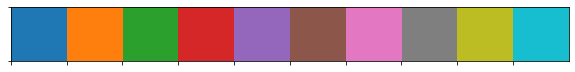

In [27]:
dataset = 'mnist'
n_class  = len(np.unique(datasets[dataset]['Y']['train']))
pal = sns.color_palette('tab10', n_class)
sns.palplot(pal)

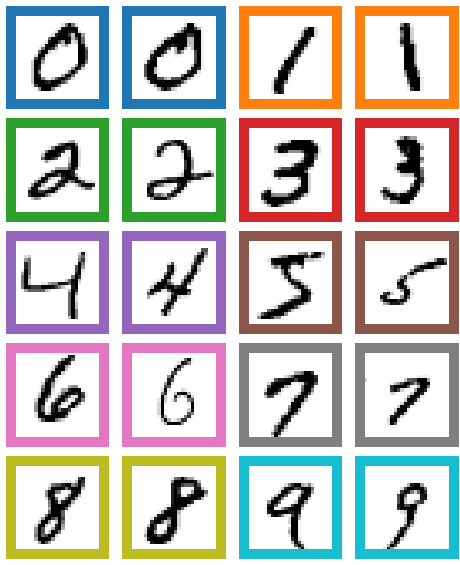

In [28]:
ncols = 4
nrows = 5
nex_per_class = 2
x = datasets[dataset]['X']['train']
y = datasets[dataset]['Y']['train']
exs = np.concatenate([[(class_, x[y == class_][i]) for i in range(nex_per_class)] for class_ in np.unique(y)])

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*2, nrows*2))
for ax, (class_, ex) in zip(axs.flatten(), enumerate(exs)):
    ax.matshow(ex[1].reshape((28,28)), cmap= plt.cm.Greys)
    #ax.axis('off')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    for spine in ax.spines.values():
        spine.set_edgecolor(pal[ex[0]])
        spine.set_linewidth(10)

figdir = FIGURE_DIR / 'data_examples' / 'mnist'
ensure_dir(figdir)
save_fig(figdir, dpi = 300, save_pdf=True, pad_inches = 0.1)

##### FMNIST

In [29]:
import seaborn as sns

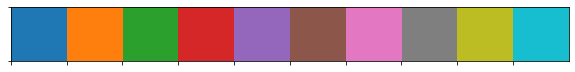

In [30]:
dataset = 'fmnist'
n_class  = len(np.unique(datasets[dataset]['Y']['train']))
pal = sns.color_palette('tab10', n_class)
sns.palplot(pal)

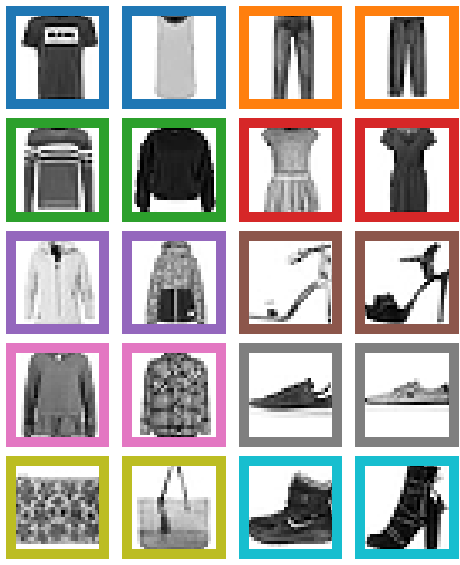

In [31]:
ncols = 4
nrows = 5
nex_per_class = 2
x = datasets[dataset]['X']['train']
y = datasets[dataset]['Y']['train']
exs = np.concatenate([[(class_, x[y == class_][i]) for i in range(nex_per_class)] for class_ in np.unique(y)])

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*2, nrows*2))
for ax, (class_, ex) in zip(axs.flatten(), enumerate(exs)):
    ax.matshow(ex[1].reshape((28,28)), cmap= plt.cm.Greys)
    #ax.axis('off')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    for spine in ax.spines.values():
        spine.set_edgecolor(pal[ex[0]])
        spine.set_linewidth(10)
        
figdir = FIGURE_DIR / 'data_examples' / 'fmnist'
ensure_dir(figdir)
save_fig(figdir, dpi = 300, save_pdf=True, pad_inches = 0.1)

##### CIFAR10

In [33]:
import seaborn as sns

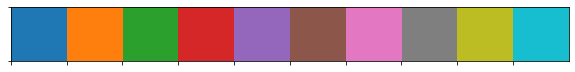

In [34]:
dataset = 'cifar10'
n_class  = len(np.unique(datasets[dataset]['Y']['train']))
pal = sns.color_palette('tab10', n_class)
sns.palplot(pal)

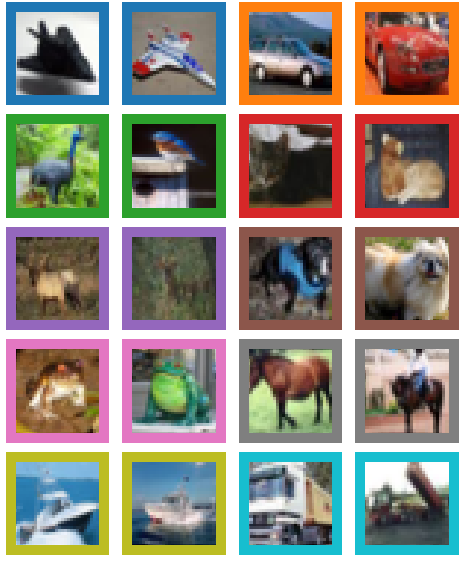

In [35]:
ncols = 4
nrows = 5
nex_per_class = 2
x = datasets[dataset]['X']['train']
y = datasets[dataset]['Y']['train']
exs = np.concatenate([[(class_, x[y == class_][i]) for i in range(nex_per_class)] for class_ in np.unique(y)])

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*2, nrows*2))
for ax, (class_, ex) in zip(axs.flatten(), enumerate(exs)):
    ax.imshow(ex[1].reshape((32,32,3)), cmap= plt.cm.Greys)
    #ax.axis('off')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    for spine in ax.spines.values():
        spine.set_edgecolor(pal[ex[0]])
        spine.set_linewidth(10)
        
figdir = FIGURE_DIR / 'data_examples' / 'cifar10'
ensure_dir(figdir)
save_fig(figdir, dpi = 300, save_pdf=True, pad_inches = 0.1)

##### cassins-dtw

In [37]:
import seaborn as sns

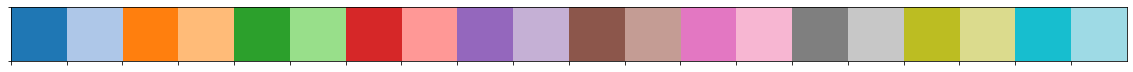

In [38]:
dataset = 'cassins_dtw'
n_class  = len(np.unique(datasets[dataset]['Y']['train']))
pal = sns.color_palette('tab20', n_class)
sns.palplot(pal)

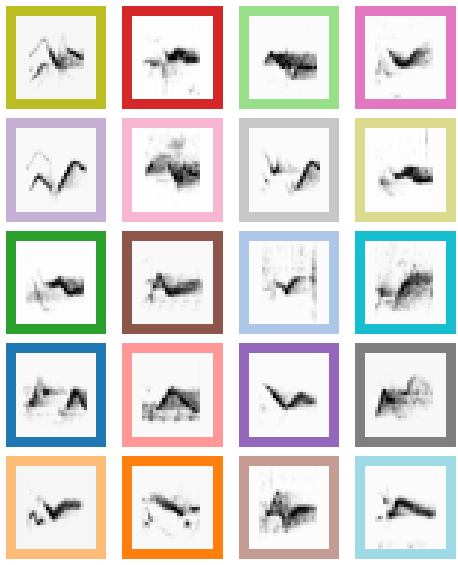

In [39]:
ncols = 4
nrows = 5
nex_per_class = 1
x = datasets[dataset]['X']['train']
y = datasets[dataset]['Y']['train']
exs = np.concatenate([[(class_, x[y == class_][i]) for i in range(nex_per_class)] for class_ in np.unique(y)])
exs = np.random.permutation(exs)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*2, nrows*2))
for ax, (class_, ex) in zip(axs.flatten(), enumerate(exs)):
    ax.matshow(ex[1].reshape((32,31)), cmap= plt.cm.Greys)
    #ax.axis('off')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    for spine in ax.spines.values():
        spine.set_edgecolor(pal[ex[0]])
        spine.set_linewidth(10)

figdir = FIGURE_DIR / 'data_examples' / 'cassins'
ensure_dir(figdir)
save_fig(figdir, dpi = 300, save_pdf=True, pad_inches = 0.1)

### macosko2015

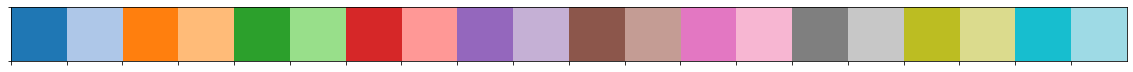

In [75]:
dataset = 'macosko2015'
n_class  = len(np.unique(datasets[dataset]['Y']['train']))
pal = sns.color_palette('tab20', 20)
sns.palplot(pal)

In [76]:
11/12 * 20

18.333333333333332

In [77]:
y = datasets[dataset]['Y']['train']

In [78]:
inverse_labs = enc.inverse_transform([[i] for i in np.unique(y)])
inverse_labs

array([['Amacrine cells'],
       ['Astrocytes'],
       ['Bipolar cells'],
       ['Cones'],
       ['Fibroblasts'],
       ['Horizontal cells'],
       ['Microglia'],
       ['Muller glia'],
       ['Pericytes'],
       ['Retinal ganglion cells'],
       ['Rods'],
       ['Vascular endothelium']], dtype=object)

In [88]:
color_df = pd.DataFrame({enc.inverse_transform([[i]])[0][0]: (np.sum(y == i), i) for i in np.unique(y)}).T.sort_values(by=[0], ascending=False)
color_df

,0,1
Rods,19949.0,10.0
Bipolar cells,4256.0,2.0
Amacrine cells,2972.0,0.0
Cones,1255.0,3.0
Muller glia,1078.0,7.0
Retinal ganglion cells,312.0,9.0
Horizontal cells,168.0,5.0
Vascular endothelium,160.0,11.0
Fibroblasts,56.0,4.0
Microglia,45.0,6.0


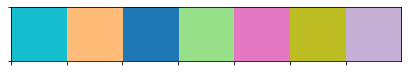

In [92]:
sns.palplot(dset_params[dataset]['cmap'](color_df[1].values / 11)[:7])

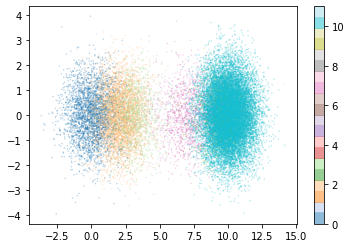

In [85]:
z = np.random.normal(size=(len(y), 2)) 
z[:,0]+=y
fig, ax = plt.subplots()
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=y,
    cmap=dset_params[dataset]['cmap'],
    s=dset_params[dataset]['s'],
    alpha=dset_params[dataset]['alpha'],
)
fig.colorbar(sc)

In [ ]:
Rods
Bipolar cells
Amacrine cells
Cones
Muller glia
Retinal ganglion cells
Horizontal cells

### bison

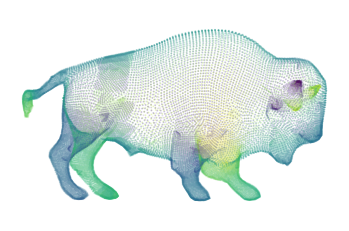

In [40]:
fig, ax = plt.subplots()
ax.scatter(-animal[:,2], animal[:,1], s = 1, c = animal[:,0], alpha = 0.1)
ax.axis('equal')
ax.axis('off')
figdir = FIGURE_DIR / 'data_examples' / 'bison'
ensure_dir(figdir)
save_fig(figdir, dpi = 300, save_pdf=True, pad_inches = 0.1)

### moons

In [94]:
x = datasets['moons']['X']['train']
y = datasets['moons']['Y']['train']

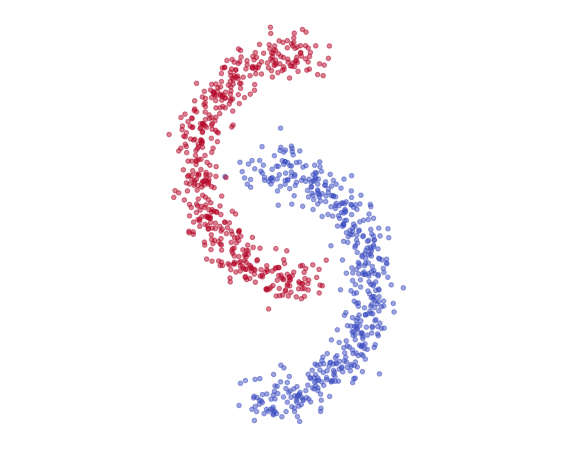

In [96]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x[:,1], x[:,0], s = 20, c = y, alpha = 0.5, cmap = 'coolwarm')
ax.axis('equal')
ax.axis('off')

figdir = FIGURE_DIR / 'data_examples' / 'moons'
ensure_dir(figdir)
save_fig(figdir, dpi = 300, save_pdf=True, pad_inches = 0.1)